In [1]:
library(mosaicData)
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Question 1 of RP

In [2]:
random_10 <- rnorm(
    10,
    mean=5,
    sd=2
)

In [3]:
mean(random_10)

[1] 5.027756

In [4]:
b <- qt(.975,df=9)*sd(random_10)/sqrt(10)
b

[1] 1.526607

In [5]:
lower <- mean(random_10)-b
upper <- mean(random_10)+b
lower
upper

[1] 3.501149

[1] 6.554362

confidence interval = (2.49825, 6.24852)
yes, the population mean of 5 is covered by my
confidence interval

Question 2 of RP

In [6]:
pop_mean <- mean(rexp(10000,rate=2))
pop_mean

[1] 0.4967692

In [7]:
means <-c()
bounds<-c()
check<-c()

for (i in 1:100){
  sample<-rexp(10,rate=2)
  m<-mean(sample)
  means<-c(means,m)
  b<-qt(.975,df=9)*sd(sample)/sqrt(10)
  bounds<-c(bounds,b)
  check<-c(check,isTRUE((m-b<pop_mean) && (pop_mean<m+b)))
}
CI_example<-data.frame(means,bounds,check)

In [8]:
x <- filter(CI_example, check==TRUE)
nrow(x)

[1] 92

This number does align with the 95% confidence, since roughly that many 95 of 100 intervals contains the mean

Question 3 of RP

In [9]:
bootmeans <-c()

for (i in 1:10000){
  bootsamp<-rexp(20,rate=2)
  bootmeans<-c(bootmeans,mean(bootsamp))
}

In [10]:
quantile(bootmeans,c(.025,.975))
boot_CI<-quantile(bootmeans,c(.025,.975))

2.5%     97.5% 
0.3067636 0.7403718

Question 1 of Project 3

In [11]:
nyc_payroll <- read.csv("NYC_Payroll2018.csv")

In [12]:
nyc_payroll

Fiscal.Year,Agency.Name,Last.Name,First.Name,Agency.Start.Date,Base.Salary,Pay.Basis,Regular.Hours,Regular.Gross.Paid,OT.Hours,Total.OT.Paid,Total.Other.Pay
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,BOARD OF ELECTION,DONNELLY,KAITLIN,07/28/2014,13.79,per Hour,234.18,4194.68,75.75,1462.71,0.00
2018,BOARD OF ELECTION,ROQUE,CONSUELO,02/28/2016,15.00,per Hour,1664.55,24004.17,87.00,1443.01,0.00
2018,BOARD OF ELECTION,NUNEZ,DAYSI,03/13/2016,19.79,per Hour,1638.88,32499.63,66.25,1435.90,65.98
2018,BOARD OF ELECTION,SMITH,THERESA,10/02/2017,15.00,per Hour,1195.75,16574.09,57.50,1005.64,48.27
2018,BOARD OF ELECTION,HENRY,JARED,10/31/2016,15.00,per Hour,1339.38,19474.25,60.75,995.80,48.27
2018,BOARD OF ELECTION,CARUSO,PHILIP,06/11/2012,15.00,per Hour,1258.75,18995.24,58.25,925.28,50.47
2018,BOARD OF ELECTION,ARATO,REBECCA,11/13/2017,27405.00,per Annum,1081.25,15047.70,22.00,393.87,0.00
2018,BOARD OF ELECTION,ROGERS,FRANK,04/09/2018,15.00,per Hour,320.25,4492.48,26.50,391.75,0.00
2018,BOARD OF ELECTION,GENDRON,MATTHEW,04/16/2018,15.00,per Hour,307.75,4328.57,20.00,375.00,0.00


In [13]:
nyc_payroll_annum <- filter(nyc_payroll, Pay.Basis=="per Annum")

In [14]:
nyc_payroll_annum

Fiscal.Year,Agency.Name,Last.Name,First.Name,Agency.Start.Date,Base.Salary,Pay.Basis,Regular.Hours,Regular.Gross.Paid,OT.Hours,Total.OT.Paid,Total.Other.Pay
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,BOARD OF ELECTION,ARATO,REBECCA,11/13/2017,27405,per Annum,1081.25,15047.70,22.00,393.87,0.00
2018,BOARD OF ELECTION,RYAN,MICHAEL,08/25/2013,216540,per Annum,1790.00,209761.79,0.00,0.00,0.00
2018,BOARD OF ELECTION,SANDOW,DAWN,11/14/2005,199387,per Annum,1790.00,193146.20,0.00,0.00,0.00
2018,BOARD OF ELECTION,PERKINS,PAMELA,02/06/1994,183425,per Annum,1790.00,177683.84,0.00,0.00,0.00
2018,BOARD OF ELECTION,RICHMAN,STEVEN,01/03/1999,180342,per Annum,1790.00,174696.52,0.00,0.00,0.00
2018,BOARD OF ELECTION,SAVINO,RAPHAEL,07/03/2011,160000,per Annum,1790.00,143260.56,0.00,0.00,0.00
2018,BOARD OF ELECTION,PUGH,GLORIA,09/26/2004,36147,per Annum,24.25,1386.46,0.00,0.00,27.46
2018,CAMPAIGN FINANCE BOARD,KING,AARON,12/14/2015,59312,per Annum,1790.00,60914.07,112.00,4528.17,386.83
2018,BOROUGH PRESIDENT-BRONX,ALCANTARA,DARISA,09/06/2016,45000,per Annum,390.00,10356.18,0.00,0.00,0.00


Question 2 of Project 3

In [15]:
sample<-sample_n(nyc_payroll_annum,15,replace=FALSE)
sample

Fiscal.Year,Agency.Name,Last.Name,First.Name,Agency.Start.Date,Base.Salary,Pay.Basis,Regular.Hours,Regular.Gross.Paid,OT.Hours,Total.OT.Paid,Total.Other.Pay
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,DEPT OF ED PEDAGOGICAL,SKRELJA,DIANA,09/03/2013,67716,per Annum,0.00,64274.81,0.00,0.00,0.00
2018,DEPT OF ED PEDAGOGICAL,O'DELL,ERIN,09/06/2016,64878,per Annum,0.00,61342.19,0.00,0.00,0.00
2018,BRONX DISTRICT ATTORNEY,PIMENTEL,ANA,04/22/2013,55000,per Annum,1790.00,57049.34,0.00,0.00,82.56
2018,DEPT OF ED PEDAGOGICAL,JOHN,ELMA,09/07/2010,90511,per Annum,0.00,92746.01,0.00,0.00,0.00
2018,POLICE DEPARTMENT,PUGH,DEAN,08/08/1996,45645,per Annum,2045.72,45520.02,224.00,8953.81,7814.08
2018,DEPT OF ED PEDAGOGICAL,CATALANO,ADRIANA,02/01/2011,96001,per Annum,0.00,100494.30,0.00,0.00,0.00
2018,DEPT OF ED PEDAGOGICAL,MARDAK,NICOLE,08/15/2011,81318,per Annum,0.00,77522.31,0.00,0.00,0.00
2018,POLICE DEPARTMENT,ARROYO,ERIKA,07/01/2004,85292,per Annum,2045.72,85058.22,311.58,22219.72,12844.40
2018,DISTRICT ATTORNEY KINGS COUNTY,SARG,RYA,10/31/2016,41036,per Annum,1790.00,41923.48,0.00,0.00,0.00


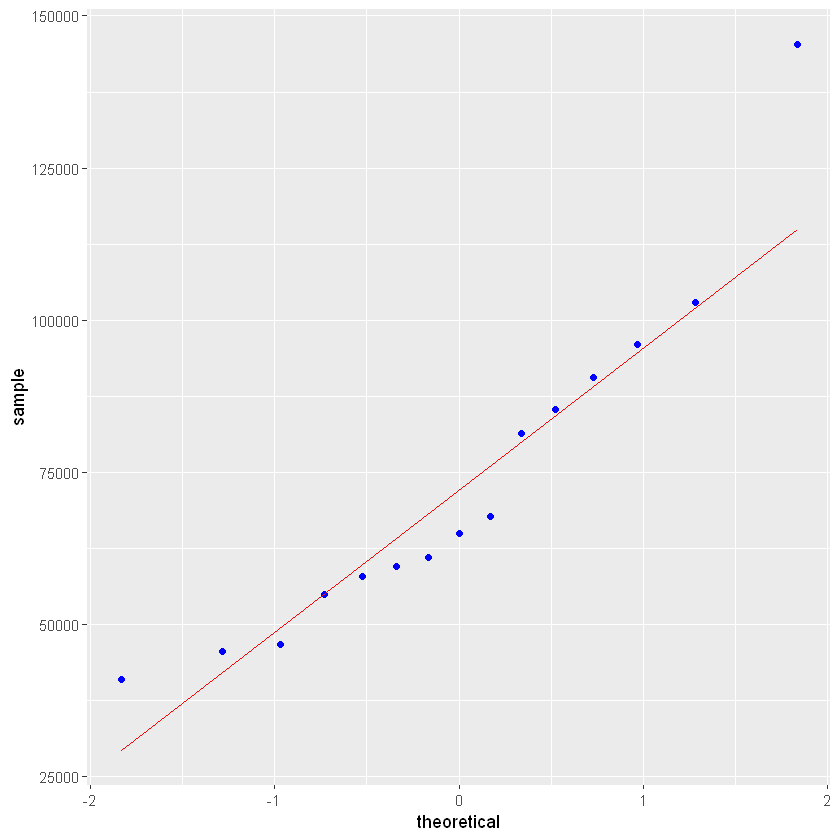

In [16]:
ggplot(sample, aes(sample=Base.Salary))+
  stat_qq(color="blue")+stat_qq_line(color="red")

Question 3 of Project 3

In [17]:
samp_mean <- mean(sample$Base.Salary)
samp_mean

[1] 73376

In [18]:
bootmeans <-c()

for (i in 1:10000){
  bootsamp<-sample_n(sample,15,replace=TRUE)
  bootmeans<-c(bootmeans,mean(bootsamp$Base.Salary))
}

In [19]:
quantile(bootmeans,c(.025,.975))
boot_CI<-quantile(bootmeans,c(.025,.975))

2.5%    97.5% 
61065.31 87697.47

Question 4 of Project 3

The population mean I calculated in part 3 is within my confidence interval

Question 5 of Project 3

In [21]:
means<-c()
check<-c()

for(i in 1:20){
    sample<-sample_n(nyc_payroll_annum,15,replace=FALSE)
    m<-mean(sample$Base.Salary)
    means<-c(means,m)
    bootmean <-c()

    for (i in 1:10000){
        bootsamp<-sample_n(nyc_payroll_annum,15,replace=TRUE)
        bootmean<-c(bootmean,mean(bootsamp$Base.Salary))
    }
    
    boot_CI<-quantile(bootmeans,c(.025,.975))
    check<-c(check,isTRUE((boot_CI[1]<samp_mean) && (samp_mean<boot_CI[2])))
    
}
CI_example1 <- data.frame(means, check)

In [22]:
filter(CI_example, check==TRUE)

means,check
<dbl>,<lgl>
93082.27,TRUE
82107.40,TRUE
79171.20,TRUE
69904.13,TRUE
68586.47,TRUE
65506.53,TRUE
72589.47,TRUE
85912.80,TRUE
83210.07,TRUE


All 20 of the confidence intervals contain the population mean.